## Datetime processing to select absolute dates (2020/09/12) when given 'Monday'. How to know when a specific day of the month is a Monday?

Earliest date is 2020/09/03, which is a Thursday.

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
boulder_data = pd.read_csv("~/Desktop/coding/boulder_data/boulderdata.csv")

In [3]:
boulder_data.head()

,gym_name,current_time,occupancy,waiting,weather_temp,weather_status
0,regensburg,2020/10/29 17:00,68.0,0.0,7.42,Rain
1,muenchen-west,2020/10/29 17:00,27.0,0.0,9.09,Rain
2,frankfurt,2020/10/29 17:00,59.0,0.0,10.75,Rain
3,dortmund,2020/10/29 17:00,11.0,0.0,9.99,Rain
4,muenchen-ost,2020/10/29 17:00,100.0,14.0,9.09,Rain


In [4]:
boulder_data.describe()

,occupancy,waiting,weather_temp
count,1984.000000,1984.000000,1984.000000
mean,47.423387,0.570565,14.425565
std,25.733930,3.857531,5.519889
min,0.000000,0.000000,2.350000
25%,28.000000,0.000000,10.157500
50%,45.000000,0.000000,13.980000
75%,66.000000,0.000000,18.130000
max,100.000000,40.000000,31.640000


In [51]:
def avg_data_day(chosen_day):
    day_name = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday','sunday']
    for ind, day in enumerate(day_name):
        if chosen_day.lower() == day:
            day_num = ind
    
    list_of_data = []
    for x in boulder_data.current_time.unique():
        date = x
        day = datetime.strptime(date, '%Y/%m/%d %H:%M').weekday()
        if day == day_num:
            list_of_data.append(x)
    ave_data = boulder_data[boulder_data['current_time'].isin(list_of_data)]
    return ave_data

In [54]:
ave_thur_data = avg_data_day('Thursday')
ave_thur_data

,gym_name,current_time,occupancy,waiting,weather_temp,weather_status
0,regensburg,2020/10/29 17:00,68.0,0.0,7.42,Rain
1,muenchen-west,2020/10/29 17:00,27.0,0.0,9.09,Rain
2,frankfurt,2020/10/29 17:00,59.0,0.0,10.75,Rain
3,dortmund,2020/10/29 17:00,11.0,0.0,9.99,Rain
4,muenchen-ost,2020/10/29 17:00,100.0,14.0,9.09,Rain
...,...,...,...,...,...,...
1979,frankfurt,2020/09/03 19:00,87.0,0.0,18.53,Clouds
1980,dortmund,2020/09/03 19:00,47.0,0.0,16.58,Clouds
1981,muenchen-ost,2020/09/03 19:00,95.0,0.0,15.21,Clouds
1982,regensburg,2020/09/03 19:00,42.0,0.0,17.04,Clouds


In [55]:
import seaborn as sns

In [56]:
sns.set_style("darkgrid")

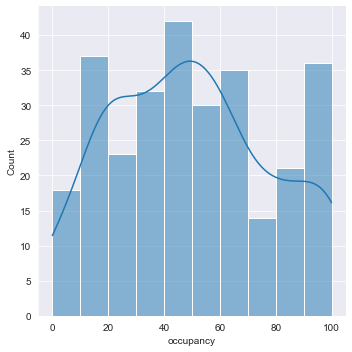

In [61]:
sns.displot(ave_thur_data, x=ave_thur_data.occupancy, kde=True);

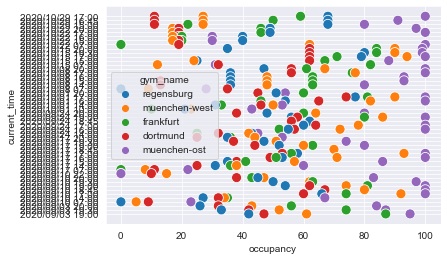

In [62]:
sns.scatterplot(ave_thur_data.occupancy, # X-axis
                ave_thur_data.current_time,  # Y-axis
                hue=ave_thur_data.gym_name,  # Dot color
                s=100);

In [ ]:
# try to filter data for each gym then plot data?